In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
dataset=load_boston()
dataset.data.shape,dataset.target.shape

((506, 13), (506,))

In [3]:
#Stratification ==the distribution of label in train and test is equal
#Random Sampling ==does'nt care for distribution of label
x_train,x_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(404, 13) (102, 13) (404,) (102,)


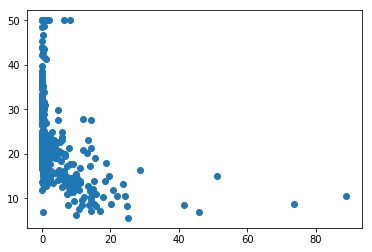

In [87]:
plt.scatter(x_train[:,0],y_train)

In [109]:
 class Multivariate_LR:
        
    def __init__(self,n_feature=5):
        self.coef=np.random.uniform(low=-1,high=1,size=(n_feature,))
        self.bias=np.random.random()
        self.theta=list()
        
    def Compute_Loss(self,X,Y):
        losses=[]
        for x , y in zip(X,Y):
            y_cap=self.Predict(x)
            loss=(y_cap-y)**2
            losses.append(loss)

        losses=np.array(losses)
        return losses.sum()/2*X.shape[0]

    def Predict(self,x):
        return self.coef.dot(x)+self.bias

    def GetAllPredict(self,X):
        pred=[]
        for x in X:
            y=self.Predict(x)
            pred.append(y)

        return pred

    def Gradient_descent(self,X,Y):
        grad_0=0
        grad_1=[]
        y_pred=np.array(self.GetAllPredict(X))
        #first calculate the theta_0
        diff=y_pred-Y
        grad_0+=diff.sum()/X.shape[0]
        #now calculate the other thetas 
        for j in range(X.shape[1]):
            grad=(diff*X[:,j]).sum()/X.shape[0]
            grad_1.append(grad)

        return (grad_0,np.array(grad_1))

    def Update_Weight(self,gradient,alpha=0.1):
        self.theta.append((self.coef,self.bias))
        self.coef-=alpha*gradient[1]
        self.bias-=alpha*gradient[0]

    def Fit(self,X,Y,alpha=0.1,iteration=10,Optimizer="batch",batch_size=1):
        #Normalise our dataset
        x=(X-X.mean(axis=0))/X.std(axis=0)
        y=(Y-Y.mean(axis=0))/Y.std(axis=0)
        if Optimizer=="batch":
            loss=[]
            for _ in range(iteration):
                gradient=self.Gradient_descent(x,y)
                self.Update_Weight(gradient,alpha)
                loss.append(self.Compute_Loss(x,y))
            return loss
        
        if Optimizer=="Sgb" and batch_size==1:
            loss=[]
            for _ in range(iteration):
                t=0
                while True:
                    if t+batch_size>X.shape[0]:
                        break
                    gradient=self.Gradient_descent(x[t:batch_size+t],y[t:t+batch_size])
                    self.Update_Weight(gradient,alpha)
                    t+=batch_size
                loss.append(self.Compute_Loss(x,y))
            return loss
      
        if Optimizer=="Mini" and batch_size>1:

            loss=[]
            for _ in range(iteration):
                t=0
                while True:
                    if t+batch_size>X.shape[0]:
                        break
                    gradient=self.Gradient_descent(x[t:batch_size+t],y[t:t+batch_size])
                    self.Update_Weight(gradient,alpha)
                    t+=batch_size
                loss.append(self.Compute_Loss(x,y))
            return loss
        
    def R2Score(self,X,Y):
        y_bar=Y.mean()
        #totalerror of mean =best model represent
        T_error=0
        for y in Y:
            T_error+=((y_bar-y)**2)
        Pred_error=0
        for x,y in zip(X,Y):
                 Pred_error+=((self.Predict(x)-y)**2)
        return (1-Pred_error/float(T_error))
            

## Training of Model Normal Gradient

In [116]:
MLR=Multivariate_LR(n_feature=13)

In [117]:
loss=MLR.Fit(x_train,y_train,iteration=200)

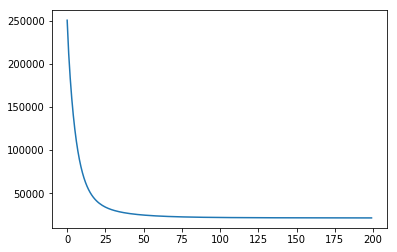

In [118]:
plt.plot(loss)

### Score Training Data

In [123]:
x1=(x_train-x_train.mean(axis=0))/x_train.std(axis=0)
y1=(y_train-y_train.mean(axis=0))/y_train.std(axis=0)
MLR.R2Score(x1,y1)

0.7369490306257525

### Score Testing Data

In [136]:
x2=(x_train-x_test.mean(axis=0))/x_test.std(axis=0)
y2=(y_train-y_test.mean(axis=0))/y_test.std(axis=0)
MLR.R2Score(x2,y2)

0.7065594489915019

## Stochastic Batch Gradient

In [125]:
MLR1=Multivariate_LR(n_feature=13)

In [126]:
Loss_sgb=MLR1.Fit(x_train,y_train,Optimizer="Sgb",iteration=100)
Loss_sgb[:4]

[4626687.152010928, 328075313.19713324, 18218478482.386288, 970215750219.8575]

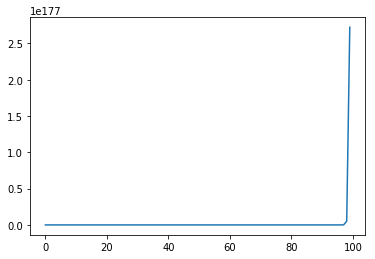

In [127]:
plt.plot(Loss_sgb)

In [128]:
MLR1.R2Score(x1,y1)

-3.336729036739523e+172

In [139]:
 MLR1.R2Score(x2,y2)

-4.4149591236030425e+172

## Mini Batch Gradient

In [110]:
MLR2=Multivariate_LR(n_feature=13)

In [111]:
Loss_mini=MLR2.Fit(x_train,y_train,Optimizer="Mini",batch_size=150,iteration=200)
Loss_mini[:4]

[450542.661614484, 289613.20374310284, 193510.65441555297, 135626.28442635562]

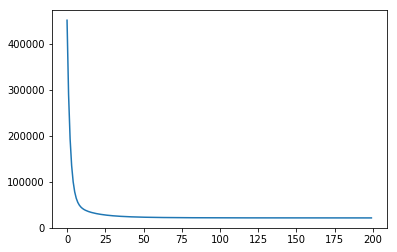

In [112]:
plt.plot(Loss_mini)

In [124]:
MLR2.R2Score(x1,y1)

0.729562439688688

In [137]:
MLR2.R2Score(x2,y2)

0.6814648506847172

## Sklearn LoadBoston

In [129]:
from sklearn.linear_model import LinearRegression

In [131]:
model=LinearRegression(normalize=True)

In [132]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [133]:
model.score(x_test,y_test)

0.7256552916985728

In [134]:
model.score(x_train,y_train)

0.7380422134063738